# Clase 11: La distribución gaussiana

Hasta ahora hemos visto distribuciones de probabilidad discretas. Es decir que nos dicen cuál es la probabilidad de cada posible resultado entre un conjunto discreto de resultados posibles.

Pero ocurre con mucha frecuencia que los resultados posibles son un continuo. Por ejemplo si medimos la posición $x$ de un objeto, ésta será dada por un número real. En este caso no tiene sentido asignar una probabilidad a cada posible posición ya que de todas formas no tenemos instrumentos que logren medir esa posición con infinita precisión. Lo que hacemos es entonces escribir la probabilidad de obtener un resultado en un intervalo $x \in (a,b)$

$$
P = \int_a^b dx\, \rho(x)\,.
$$

La función $\rho$ se llama una *función de densidad de probabilidad* (PDF). Como la probabilidad total debe ser $1$ escribimos

$$
\int_{-\infty}^\infty dx\,\rho(x) = 1\,.
$$

Definimos el valor promedio y la varianza de manera análoga a como lo hicimos para el caso discreto

$$
\mu = \langle x \rangle = \int_{-\infty}^\infty dx\,x\rho(x)\,,
$$

$$
\sigma^2 = \langle (x - \mu)^2 \rangle =  \int_{-\infty}^\infty dx\,(x - \mu)^2 \rho(x)\,.
$$

## La distribución gaussiana

La PDF más útil es la gaussiana, pronto veremos por qué

$$
\rho(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In [15]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import numpy as np

Using matplotlib backend: agg


In [5]:
def gauss(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

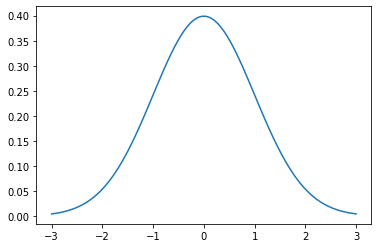

In [17]:
x = np.linspace(-3, 3, 100)
plt.plot(x, gauss(x, 0, 1))
plt.show()

La gaussiana cumple las siguientes propiedades

* $\langle x \rangle = \mu$

* $\langle (x - \mu)^2\rangle = \sigma^2$

* $\int_{-\sigma}^\sigma dx\, \rho(x) = 0.682689$

* $\int_{-2\sigma}^{2\sigma} dx\, \rho(x) = 0.9545$

* $\int_{-3\sigma}^{3\sigma} dx\, \rho(x) = 0.9973$

* $\int_{-5\sigma}^{5\sigma} dx\, \rho(x) = 0.999999$

## Teorema central del límite

Muchas distribuciones tienden a parecerse a la distribución gaussiana en algún límite. Tomemos la distribución binomial de la clase pasada

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


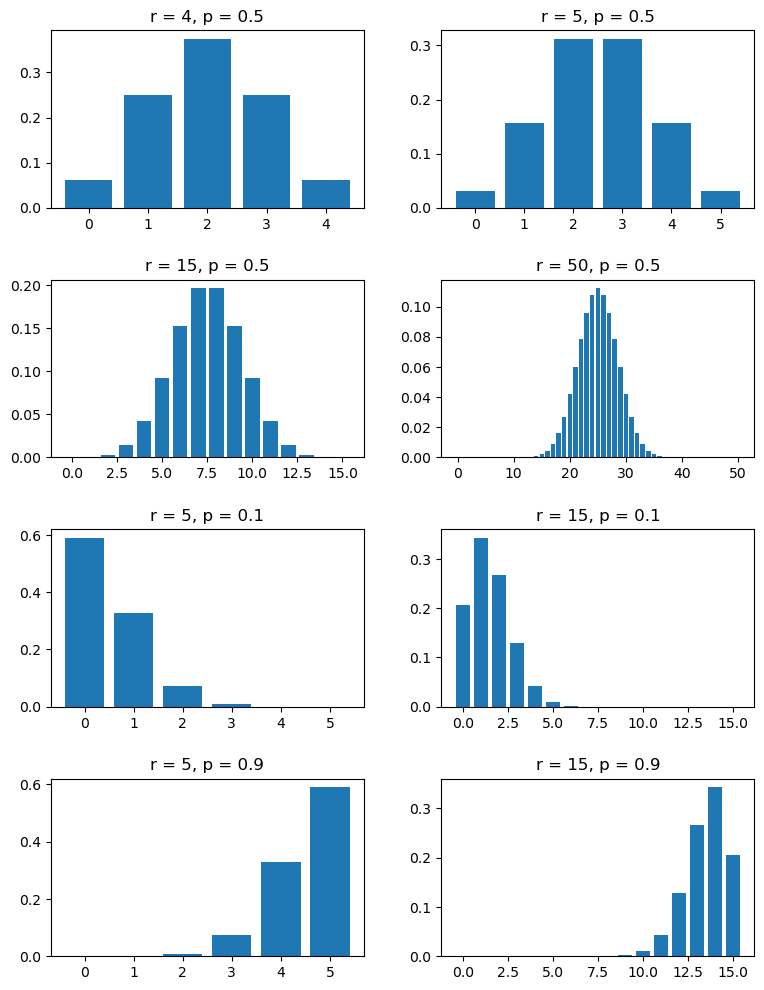

In [12]:
from scipy.special import comb

def binomial(n, r, p):
    return comb(r, n)*p**n*(1-p)**(r - n)

def probs(r, p):
    return [binomial(n, r, p) for n in range(r+1)]

fig = plt.figure(figsize=(8,20), dpi= 100)

ax1 = fig.add_subplot(8,2,1)
ax2 = fig.add_subplot(8,2,2)
ax3 = fig.add_subplot(8,2,3)
ax4 = fig.add_subplot(8,2,4)
ax5 = fig.add_subplot(8,2,5)
ax6 = fig.add_subplot(8,2,6)
ax7 = fig.add_subplot(8,2,7)
ax8 = fig.add_subplot(8,2,8)

ax1.bar(range(4+1), probs(4,0.5))
ax2.bar(range(5+1), probs(5,0.5))
ax3.bar(range(15+1), probs(15,0.5))
ax4.bar(range(50+1), probs(50,0.5))
ax5.bar(range(5+1), probs(5,0.1))
ax6.bar(range(15+1), probs(15,0.1))
ax7.bar(range(5+1), probs(5,0.9))
ax8.bar(range(15+1), probs(15,0.9))
        
ax1.set_title('r = 4, p = 0.5')
ax2.set_title('r = 5, p = 0.5')
ax3.set_title('r = 15, p = 0.5')
ax4.set_title('r = 50, p = 0.5')
ax5.set_title('r = 5, p = 0.1')
ax6.set_title('r = 15, p = 0.1')
ax7.set_title('r = 5, p = 0.9')
ax8.set_title('r = 15, p = 0.9')

fig.tight_layout(pad=2.0)


fig.show()

Cuando el número de muestras $r$ tiende a ser grande, la distribución tiende a una gaussiana con media $\mu = rp$ y varianza $np(1-p)$.

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


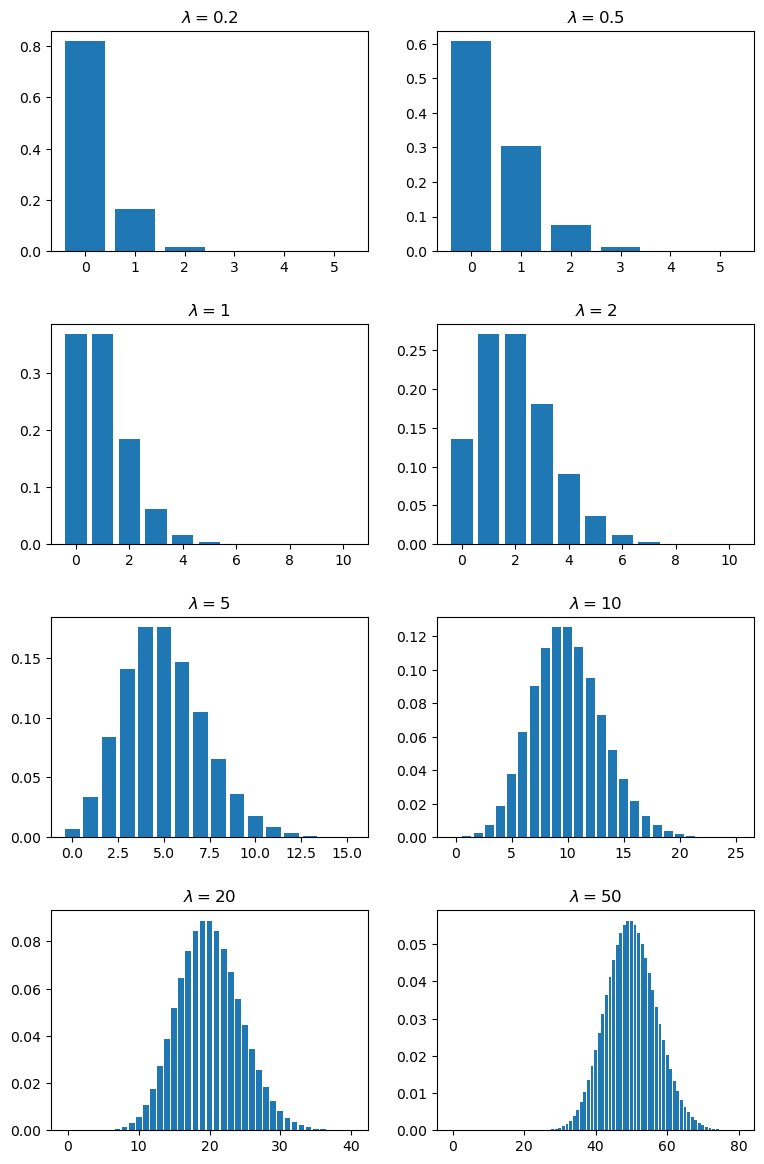

In [13]:
def poisson(n, lamda):
    return lamda**n*np.exp(-lamda)/np.math.factorial(n)

def probs(lamda, m):
    return [poisson(n, lamda) for n in range(m+1)]

fig = plt.figure(figsize=(8,12), dpi= 100)

ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)

ax1.bar(range(5+1), probs(0.2, 5))
ax2.bar(range(5+1), probs(0.5, 5))
ax3.bar(range(10+1), probs(1, 10))
ax4.bar(range(10+1), probs(2, 10))
ax5.bar(range(15+1), probs(5, 15))
ax6.bar(range(25+1), probs(10, 25))
ax7.bar(range(40+1), probs(20, 40))
ax8.bar(range(80+1), probs(50, 80))
        
ax1.set_title('$\lambda = 0.2$')
ax2.set_title('$\lambda = 0.5$')
ax3.set_title('$\lambda = 1$')
ax4.set_title('$\lambda = 2$')
ax5.set_title('$\lambda = 5$')
ax6.set_title('$\lambda = 10$')
ax7.set_title('$\lambda = 20$')
ax8.set_title('$\lambda = 50$')

fig.tight_layout(pad=2.0)


fig.show()

Para $\lambda$ grande de nuevo encontramos una gaussiana con media $\lambda$ y varianza $\lambda$.

Además de aparecer como el límite de muchas distribuciones, la gaussiana también aparece cuando buscamos la distribución de probabilidad de una suma de variables aleatorias independientes.

In [63]:
aleatorios = np.random.random(10000)

In [64]:
aleatorios.std()

0.28983153032345876

In [65]:
aleatorios.mean()

0.5022289246262133

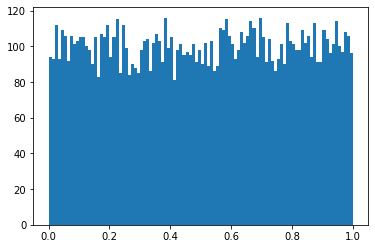

In [66]:
plt.hist(aleatorios, bins=100)
plt.show()

In [67]:
aleatorios = np.random.random(10000) + np.random.random(10000)

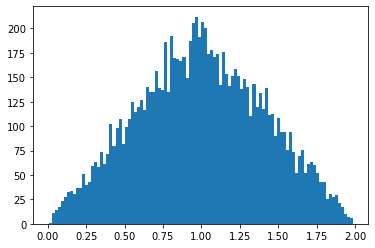

In [68]:
plt.hist(aleatorios, bins=100)
plt.show()

In [69]:
aleatorios.std()

0.4091545234047753

In [70]:
aleatorios.mean()

0.9957713332935693

In [71]:
aleatorios = np.random.random(10000) + np.random.random(10000) + np.random.random(10000) + np.random.random(10000)

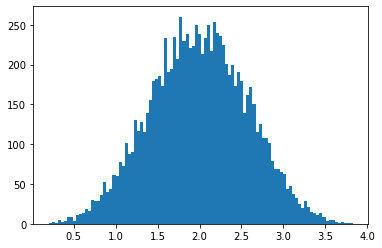

In [72]:
plt.hist(aleatorios, bins=100)
plt.show()

In [73]:
aleatorios.std()

0.5764941614094825

In [74]:
aleatorios.mean()

1.9928775231653704

In [75]:
aleatorios = sum([np.random.random(10000) for i in range(200)])

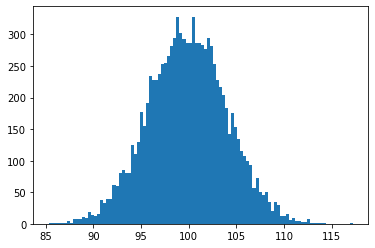

In [76]:
plt.hist(aleatorios, bins=100)
plt.show()

In [77]:
aleatorios.std()

4.115931318780232

In [79]:
aleatorios.mean()

99.89269371594375

En este caso sumamos muchas variables independientes tomadas de una distribución uniforme, pero se cumple en general. Ese se llama el

**Teorema central del límite**: Considere la suma $X = \sum_{i = 1}^N x_i$ de $N$ variables aleatorias independientes $x_i$, cada una tomada de una distribución con media $\mu_i$ y varianza $\sigma_i^2$. La distribución de $X$ cumple:

* Tiene valor esperado $\langle X \rangle = \sum_i \mu_i$.

* Tiene varianza $\sigma^2(X) = \sum_i \sigma_i^2$.

* Tiende a una gaussiana a medida que $N \rightarrow \infty$.

$$\langle X \rangle = \langle \sum_i x_i\rangle = \sum_i \langle x_i \rangle = \sum_i \mu_i $$


$$\sigma^2(X) = \langle (\sum_i x_i - \sum_i \mu_i)^2 \rangle = \langle \sum_i(x_i - \mu_i)^2 \rangle + \langle\sum_{i \neq j}(x_i - \mu_i)(x_j - \mu_j)\rangle = \sum_i \langle(x_i - \mu_i)^2\rangle$$

Por estos motivos los errores de un experimento se modelan con una distribución gaussiana. El origen del error puede venir de muchos factores independientes que se suman. Esa suma tiende a una gaussiana según el teorema central del límite.

## Mediciones repetidas

Hagamos una primera aplicación del teorema central del límite.

Si queremos medir una cantidad, muchas veces conviene tomar el promedio sobre varias mediciones. Esto reduce el error del resultado

Supongamos que la medición de una cantidad $x$ arroja un valor aleatorio (valor verdadero + error) con un valor esperado $\mu$ (que es el verdadero valor de la cantidad $x$) y varianza $\sigma^2$. La varianza el el tamaño típicoo del error cometido al medir la cantidad.

Si realizamos $N$ mediciones $x_i$ de la misma cantidad, sabemos que $X = \sum_i x_i$ tiene un valor esperado

$$
\langle X \rangle = N \mu
$$

y una varianza

$$
\sigma^2(X) = N\sigma^2.
$$

El promedio de las mediciones es $\bar{x} = \frac{1}{N} \sum_i x_i = \frac{X}{N}$. El valor esperado de este promedio es

$$
\langle \bar{x} \rangle = \frac{1}{N} \langle X \rangle = \mu
$$

Esto quiere decir que esperamos que el promedio nos arroje el valor de la cantidad. La ventaja es que su varianza es menor que la varianza de $x$.

$$
\sigma^2(\bar{x}) = \langle (\bar{x} - \mu)^2 \rangle = \frac{1}{N^2} \langle (X - N\mu)^2 \rangle = \frac{1}{N^2} N\sigma^2\,.
$$

Es decir, el error típico cometido al usar el promedio es

$$
\sigma(\bar{x}) = \frac{1}{\sqrt{N}}\sigma
$$

que es menor que el error de cada medición por un factor $1/\sqrt{N}$.

¡Simulemos estos hechos!

In [97]:
# Generaomos 100 mediciones de una cantidad con un valor real de 10
# y con un error típico de 1
mediciones = np.random.normal(10, 1, 100)

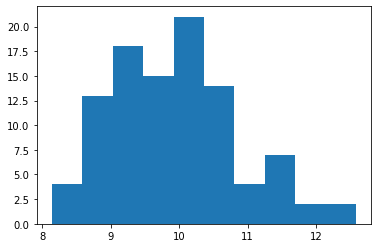

In [102]:
plt.hist(mediciones)
plt.show()

In [104]:
# Una mediición aislada tiene un error de orden 1
mediciones[0]

8.620902143359835

In [107]:
# La desviacion estandar de los datos es cercana a la de la distribución
mediciones.std()

0.9550558267058513

In [105]:
# ahora cada medición es el promedio de 10 mediciones independientes
promedios = sum(np.random.normal(10, 1, 100) for i in range(10))/10

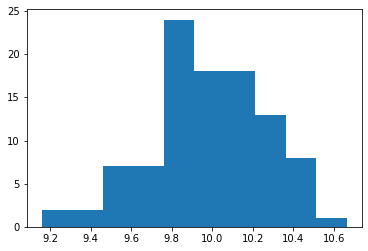

In [106]:
# los promedios son mucho más cercanos al valor verdadero
plt.hist(promedios)
plt.show()

In [108]:
# El error típico, dado por la desviación estándar, es lo prometidoo
promedios.std()

0.29129211924040416

In [109]:
1/np.sqrt(10)

0.31622776601683794

## Tareas

### Tarea 6.1

Considere los siguientes conjuntos de mediciones de una cierta cantidad que tiene un valor verdadero de $10$ y la medición tiene un error gaussiano de $\pm 0.1$ a un nivel de confiaza del $68\%$. ¿Cuál de ellos es anómalo? ¿Por qué? ¿Qué interpretación le da?

In [31]:
# Conjunto 1
c1 = [10.09728388, 14.00677546,  9.97330124, 10.03403577, 10.11014852,
        9.85702412, 10.06725561, 10.08586217,  9.99805356, 10.09222044,
        9.96873542, 10.0603082 ,  9.78777855, 10.01658336, 10.12528138,
       14.1191067 ,  14.88058074,  9.93142885, 10.36578158, 10.09212493,
        9.88930781,  9.9849203 , 10.02020365, 10.06761813, 10.00167307,
       14.14360885,  9.97572225, 10.15246422,  9.99133822,  9.90424116,
       10.10501793,  9.91869535, 10.07039047, 10.06006262, 10.01032325,
       10.00433072,  9.94767238,  9.93286478, 10.03173287,  9.92066554,
        9.97108415,  9.83034826,  9.94135165,  9.97791295, 10.16112762,
       10.06797202, 10.0263643 ,  9.97961471,  9.78969763, 10.05166943,
        9.91131264,  9.98634534,  9.97974543, 10.07362277,  9.88424591,
        9.99315227, 13.08325547, 10.02539059, 10.1065997 ,  9.83627837,
        9.96746961, 10.11354781,  9.98733076,  9.86269556, 10.06259149,
        9.73748286, 10.12718777, 10.02529891,  9.96605039, 10.03798876,
       10.02311967, 14.09473823,  9.9550051 , 10.17043078, 10.09425491,
       10.09005108, 10.01950653, 14.02402728,  9.89166114,  9.89202929,
        9.84356976,  9.95499455,  9.98309913,  9.9321069 , 10.02759998,
       10.01884409,  9.93640317,  9.84393786, 10.0192927 , 10.17990282,
        9.89937182, 10.02106925, 10.01263725,  9.89573905, 10.11424838,
       10.08980671, 15.03267925,  9.84762111,  9.96499894,  9.91684104]

# Conjunto 2
c2 = [10.13630034,  9.97264447, 10.04529035, 10.09188684, 10.00855386,
        9.90416116, 10.06281985, 10.10757175,  9.91838149, 10.0493961 ,
       10.02446199, 10.10448656,  9.77283484,  9.85600398,  9.90039543,
        9.82106987, 10.04031262, 10.06144001, 10.10988717,  9.74308934,
        9.99702215,  9.9859704 ,  9.89807371,  9.99585103,  9.93988323,
        9.89990546, 10.05643454,  9.94774945, 10.05428393,  9.88404769,
       10.00726402,  9.92586135,  9.961164  , 10.01782874,  9.92329839,
       10.06092894,  9.95886161,  9.89049626, 10.07754125,  9.83061899,
       10.13919176,  9.96898158, 10.06438291, 10.02476394,  9.81875984,
       10.0655806 , 10.00193677,  9.96395486,  9.89494378,  9.98505133,
        9.95691616,  9.97416592, 10.10692325, 10.18250899, 10.10749261,
       10.1037641 ,  9.86450491,  9.85218941, 10.02603336,  9.89537915,
        9.89940417,  9.91235537, 10.05523101, 10.08142251, 10.01086045,
        9.96034572, 10.1482815 ,  9.99360685,  9.91925958, 10.10239163,
       10.03106757,  9.93136713, 10.01773794, 10.05200499, 10.10178781,
        9.87483023,  9.94272878,  9.9671527 ,  9.99712438,  9.91594426,
        9.99679193,  9.88884633, 10.07940955,  9.90776214, 10.0123038 ,
        9.96426746, 10.01747625, 10.0392178 , 10.05489883,  9.67062975,
       10.06149946, 10.09805716,  9.83077801, 10.00208448, 10.02687927,
        9.99354725,  9.96120681,  9.94538711,  9.96279696,  9.86707357]

# Conjunto 3
c3 = [ 9.9032974 , 10.06746832,  9.98360179, 10.02011113, 10.01317417,
       10.09982861,  9.93307724, 10.04944268,  9.9000297 ,  9.96237539,
        9.91807876, 10.00338938,  9.99543713, 10.04674212, 10.08063919,
        9.99627534, 10.04558084, 10.06576491, 10.01787305,  9.90861284,
        9.99567107,  9.92934922, 10.07999909, 10.04248524, 10.04884959,
        9.90839636, 10.04266824,  9.98720842,  9.92392857, 10.00288059,
        9.96299254, 10.06967059,  9.94880142,  9.92020426, 10.07145123,
        9.91179764,  9.95914293,  9.98200017,  9.93190323,  9.92372118,
        9.90601205, 10.09884219, 10.04411164,  9.91673593, 10.09883873,
       10.06399646, 10.05061298, 10.02253924, 10.00159467,  9.98862911,
        9.99792681,  9.96149526,  9.93018115,  9.95211   ,  9.94530659,
        9.9713637 ,  9.91789999, 10.06730498, 10.02326566, 10.06438782,
        9.9794271 , 10.06077859,  9.99556797,  9.98272556, 10.01617789,
        9.95166775, 10.00406298, 10.02627066,  9.98342611, 10.03584277,
        9.98478095, 10.0834946 , 10.01403125, 10.04629496, 10.01444209,
       10.02043805, 10.01325408,  9.96317469,  9.93915936, 10.04026662,
       10.06055512,  9.98923231, 10.07144049, 10.09482468,  9.94512088,
       10.07417098, 10.00802839, 10.01338588,  9.96553168,  9.96240508,
        9.9963694 ,  9.96827214,  9.91378322,  9.96249148, 10.02461909,
        9.98179311,  9.95811448,  9.9903446 , 10.01001352, 10.06304347]

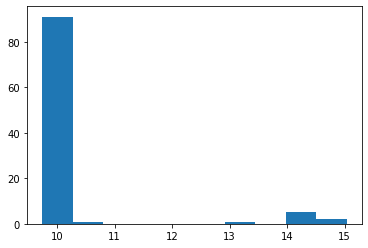

In [32]:
plt.hist(c1)
plt.show()

Vemos que algunos números son demasiado grandes, tal que no parece venir de una distribución gaussiana.

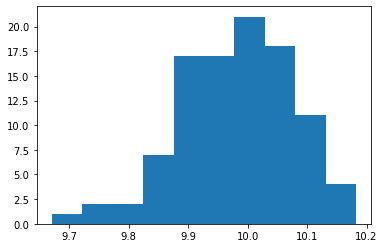

In [33]:
plt.hist(c2)
plt.show()

Este conjunto de datos parece tener una cola hacia números pequeños. Sin embargo es pequeña y podría venir de una distribución gaussiana.

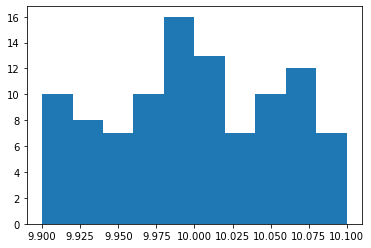

In [28]:
plt.hist(c3)
plt.show()

Este conjunto de datos no tiene "colas". Los números están muy limpiamente distrbuidos exactamente entre 9.9 y 10.1. Es altamente improbable que esto venga de una distribución gaussiana.

### Tarea 6.2

Consideremos una distribución gaussiana de dos variables $x$, $y$ dada por

$$
\rho(x,y) = \frac{\sqrt{c_{xx}c_{yy} - c_{xy}^2}}{2\pi}\exp\left[-\frac{1}{2}c_{xx} (x - \mu_x)^2 - c_{xy} (x - \mu_x)(y - \mu_y) - \frac{1}{2} c_{yy} (y - \mu_y)^2\right]
$$

La probabilidad de obtener un valor dado de $x$ independiente del valor de $y$ está dada por

$$
\rho(x) = \int_{-\infty}^\infty dy\,\rho(x,y)\,,
$$

porque sumamos sobre todos los posibles valores de $y$. A esto se lo llama "marginalizar sobre y".

Considere el caso $c_{xx} = 2$, $c_{yy} = 1$, $c_{xy} = 1.4$, $\mu_x = 3$, $\mu_y = 4$.

* Grafique las distribuciones de probabilidad $\rho(x)$ y $\rho(y)$.

* Grafique la distribución en 3 dimensiones (el eje $z$ es el valor de $\rho$).

* Suponga que esta probabilidad representa el resultado de un experimento que a partir de ciertos datos asigna una probabilidad a las cantidades $x$ y $y$. Discuta qué se puede concluir sobre el punto $x = 0$, $y = 0$.

Al integrar sobre $x$ obtenemos

$$
\rho(y)= 0.0480771 e^{(0.08 - 0.01 y) y}
$$

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

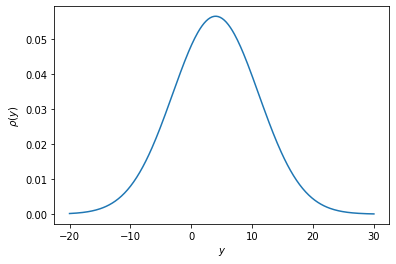

In [37]:
y = np.linspace(-20,30,300)
rhoy = 0.0480771*np.exp((0.08 - 0.01*y)*y)
plt.plot(y, rhoy)
plt.ylabel('$\\rho(y)$')
plt.xlabel('$y$')
plt.show()

Al integrar sobre $y$ obtenemos

$$
\rho(y)= 0.0666449 e^{(0.12 - 0.02 x) x}
$$

Text(0.5, 0, '$x$')

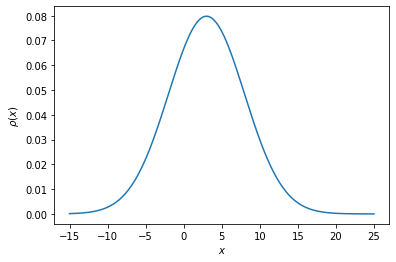

In [38]:
x = np.linspace(-15,25,300)
rhox = 0.0666449*np.exp((0.12 - 0.02*x)*x)
plt.plot(x, rhox)
plt.ylabel('$\\rho(x)$')
plt.xlabel('$x$')

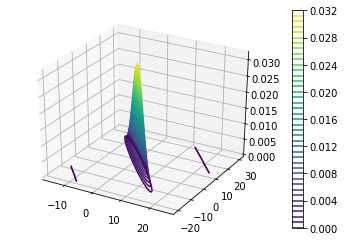

In [46]:
from mpl_toolkits import mplot3d

def dist(X, Y):
    return np.array([[0.031831*np.exp(-(-3 + xi)**2 - 1.4*(-3 + xi)*(-4 + yi) - 1/2*(-4 + yi)**2) for xi in x] for yi in y])

X, Y = np.meshgrid(x, y)
Z = dist(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
CS = ax.contour3D(X, Y, Z, 50 )
fig.colorbar(CS)
plt.draw()

Vemos que el punto $x = 0$, $y = 0$ está en 7na región con baja probabilidad, a pesar de parecer que la probabilidad es alta en los gráficos marginalizados.

### Tarea 6.3

En un experimento de mecánica cuántica que realizamos una sola vez queremos medir un observable $x$ que depende de un cantidad $M$. 

De la teoría podemos calcular la probabilidad de obtener $x$ para un valor dado de la masa spreducida $M$

$$
\rho(x|M) = \frac{M}{\sqrt{\pi}}e^{-M^2x^2}
$$

Al medir $x$ se obtiene el siguiente resultado: 


In [2]:
x = 1.56

Si todos los valores de $M$ entre $0$ y $10$ son a priori igualmente probables, use el teorema de Bayes para encontrar $\rho(M|x)$ y grafíquela para el valor de $x$ dado. ($\rho(x)$ se puede calcular exigiendo que la probabilidad $\rho(M|x)$ esté bien normalizada).

$$\rho(M|x) = \frac{\rho(x|M) \rho(M)}{\rho(x)}$$

$$
\rho(M) = \left\{\begin{array}{cc} 0.1 & \text{si}\quad M\in (0,10)\\ 0 & \text{si}\quad M \notin (0,10)\end{array}\right.
$$

$$
\rho(x) = \int dM\,\rho(x|M)\rho(M) = \int_0^{10} dM\,\frac{M}{\sqrt{\pi}}e^{-M^2x^2} = \frac{1}{2x^2\sqrt{\pi}}\left(1-e^{-100 x^2}\right)
$$

In [1]:
def rho(M, x):
    
    if 0 < M < 10:
        return (2*M*x**2)*np.exp(-M**2*x**2)/(1-np.exp(-100*x**2))
    else:
        return 0

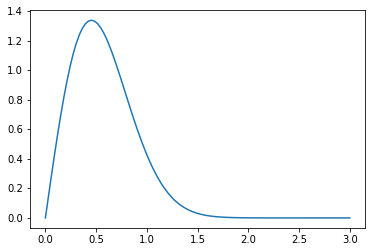

In [7]:
M= np.linspace(0, 3, 100)

plt.plot(M, [rho(m, x) for m in M])

### Tarea 6.4

Un cierto detector de partículas es golpeado por $100$ partículas cada minuto, todas con la misma velocidad de $0.99 c$ donde $c$ es la velocidad de la luz. El detector mide la velocidad de lás partículas con un error de $0.01 c$.

Escriba un código que simule la distribución de velocidades observadas por el detector en 10 segundos. (Pista: Consulte cómo extraer un número aleatorio de una distribución discreta).

Grafique la distribuciòn de velocidades simulada.

In [14]:
def poisson(k, lamda):
    return lamda**k*np.exp(-lamda)/np.math.factorial(k)

draw = np.random.random()
lamda = 100/6.

n = 0
prob = poisson(n, lamda)
while prob < draw:
    n += 1
    prob += poisson(n, lamda)
    
velocidades = np.random.normal(0.99, 0.01, n)

Text(0, 0.5, 'Nro. eventos')

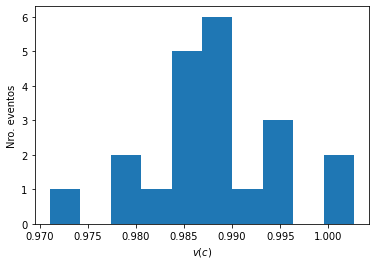

In [16]:
plt.hist(velocidades)
plt.xlabel('$v (c)$')
plt.ylabel('Nro. eventos')

### Tarea 6.5

Veinte números aleatorios independientes se sacan de una distribución uniforme entre 0 y 1. 

* Use monte carlo para estimar la probabilidad de que la suma de los números esté entre 9 y 10. Ídem entre 15 y 16.

* Use el teorema del límite central y compare con la distribución gaussiana. (Se dice que la gaussiana no describe eventos en las colas.)

Recuerde estimar el error de la simulación, así como cuantificar con errores relativos la diferencia entre la simulación y la gaussiana.

Pista:

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

donde $\text(a)$ es la función de error y en python se puede llamar usando scipy.special.erf del modulo scipy.

In [236]:
points= 160000
sims = 10

def prob_intervalo(a, b, res):
    return np.count_nonzero((res > a)*(res < b))/ points

probs1 = np.zeros(sims)
probs2 = np.zeros(sims)

for i in range(sims):
    res = np.array([sum(np.random.random(10)) for i in range(points)])
    probs1[i] = prob_intervalo(4, 5, res)
    probs2[i] = prob_intervalo(8, 9, res)

In [247]:
prob1mc = probs1[0]

In [248]:
prob2mc = probs2[0]

In [239]:
probs1.std()

0.0011890005322223358

In [240]:
probs2.std()

4.839615170651485e-05

In [143]:
import scipy as sp

La varianza de una distribución uniforme es

$$
\int_0^1 dx\, (x - 1/2)^2 = \frac{1}{12}
$$

tal que la gaussiana del teorema central del límite tiene una varianza

$$
\sigma^2 = \frac{10}{12}
$$

In [241]:
sigma = np.sqrt(10/12)
mu = 10/2

La probabilidad de obtener un resultado entre $a$ y $b$ para la gaussiana se puede obtener a partir de la función de error 

$$
P = \frac{1}{2}\left(\text{erf}\left(\frac{b - \mu}{\sqrt{2}\sigma}\right) - \text{erf}\left(\frac{a - \mu}{\sqrt{2}\sigma}\right)\right)
$$

In [242]:
def prob_intervalo_gauss(a, b):
    p1 = sp.special.erf((b - mu)/(np.sqrt(2)*sigma))
    p2 = sp.special.erf((a - mu)/(np.sqrt(2)*sigma))
    return (p1 - p2)/2

In [250]:
prob1g = prob_intervalo_gauss(4, 5)

In [249]:
prob2g = prob_intervalo_gauss(8, 9 )

In [256]:
np.abs(prob1mc - prob1g)/prob1g

0.0038233171744722935

In [257]:
np.abs(prob2mc - prob2g)/prob2g

0.4642303260334857

Vemos que el error sobre la probabilidad en el segundo caso es grande. Este es un error de la aproximación y no numérico ya que el error de amonte Carlo es mucho menor

In [259]:
probs2.std()/prob2g

0.0964807085433802

Esto ilustra el hecho que la convergencia a una gaussiana garantizada por el teorema central del límite es lenta en las colas, es decir a varias desviaciones estándar de la media.